<left><font size="6">**Détection de faux billets**

<left><font size="4">**Scénario:**
    

Votre société de consulting informatique vous propose une nouvelle mission au ministère de l'Intérieur, dans le cadre de la lutte contre la criminalité organisée, à l'Office central pour la répression du faux monnayage. Votre mission si vous l'acceptez : créer un algorithme de détection de faux billets.

Vous vous voyez déjà en grand justicier combattant sans relâche la criminalité organisée en pianotant à mains de maître votre ordinateur, pour façonner ce fabuleux algorithme  qui traquera la moindre fraude et permettra de mettre à jour les réseaux secrets de faux-monnayeurs ! La classe, non ?

... Bon, si on retombait les pieds sur terre? Travailler pour la police judiciaire, c'est bien, mais vous allez devoir faire appel à vos connaissances en statistiques, alors on y va !

<left><font size="4">**Les données:**
    
    
La PJ vous transmet un jeu de données contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

    - la longueur du billet (en mm) ;
    - la hauteur du billet (mesurée sur le côté gauche, en mm) ;
    - La hauteur du billet (mesurée sur le côté droit, en mm) ;
    - la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
    - la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
    - la diagonale du billet (en mm).

# Analyse Exploratoire des données

In [1954]:
import pandas as pd
import numpy as np
notes=pd.read_csv("notes.csv", sep=",")
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


Le jeu de données fourni les données géométriques de 170 billets de banque.

In [1955]:
notes.dtypes # vérification du type de variables du dataframe "notes"

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

Le dataframe est composé d'une variable qualitative et de 6 vatiables quantitatives.

In [1900]:
Repartition=notes['is_genuine'].value_counts() # compte le nombre de billets "vrai" et "faux"
Repartition

True     100
False     70
Name: is_genuine, dtype: int64

On remarque une répartition en faveur des "vrais" billets .

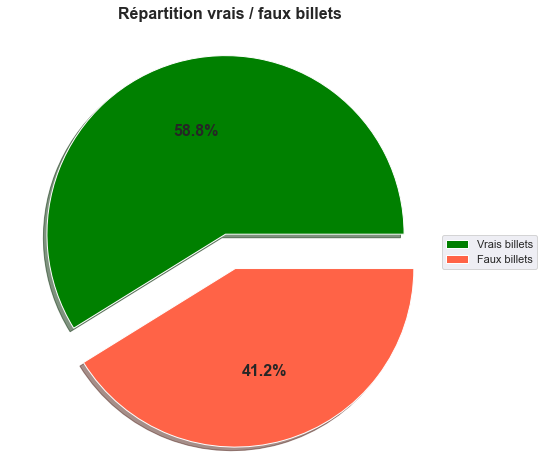

In [1811]:
from matplotlib import pyplot as plt
import seaborn as sns

myexplode= [0.1, 0.1]
plt.axis('equal')
Repartition.plot(kind='pie',explode = myexplode,labels=None, shadow = True, labeldistance = 1.06,autopct="%1.1f%%", figsize = (8, 8), colors=["green","tomato"],textprops={'fontsize': 16,'fontweight':"bold"})
plt.ylabel(None)
plt.legend(labels=['Vrais billets','Faux billets'], loc="upper right", bbox_to_anchor=(1.20, 0.55))
plt.title('Répartition vrais / faux billets', fontsize=16, fontweight="bold", fontname="Arial", pad=15)
plt.savefig("Répartitions_vrais_faux_billets.jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show()


In [1812]:
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [1813]:
notes.describe(include="all") # description des données 

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


Je crée un boxplot par variable afin de mettre en lumière la répartition des dimensions des billets selon qu"ils soient "vrais" ou "faux" :

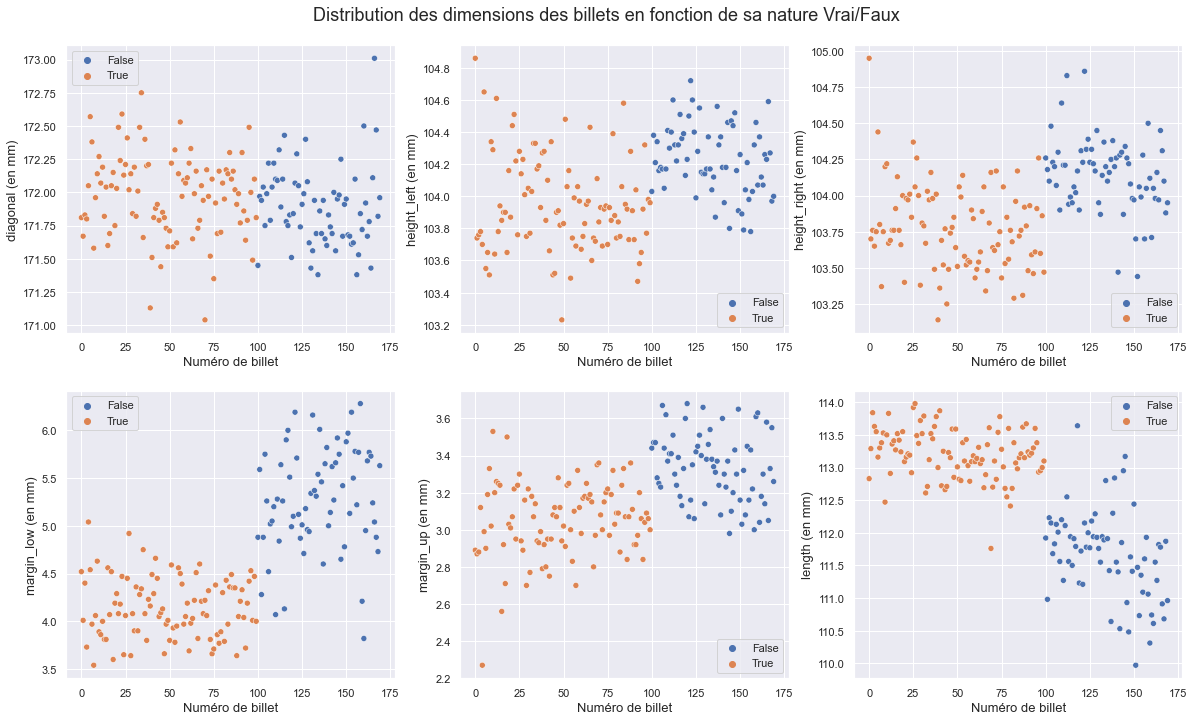

In [1814]:
fig = plt.figure(figsize=(20,18))
fig.suptitle("Distribution des dimensions des billets en fonction de sa nature Vrai/Faux", fontsize=18, y=0.91)

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

sns.scatterplot(data=notes, x = notes.index, y = "diagonal",  hue="is_genuine",ax=ax1)
ax1.set_xlabel("Numéro de billet", fontsize=13)
ax1.set_ylabel("diagonal (en mm)", fontsize=13)
ax1.legend( loc='best')

sns.scatterplot(data=notes, x = notes.index, y = "height_left",  hue="is_genuine",ax=ax2)
ax2.set_xlabel("Numéro de billet",fontsize=13)
ax2.set_ylabel("height_left (en mm)",fontsize=13)
ax2.legend(loc='lower right')

sns.scatterplot(data=notes, x = notes.index, y = "height_right",  hue="is_genuine",ax=ax3)
ax3.set_xlabel("Numéro de billet",fontsize=13)
ax3.set_ylabel("height_right (en mm)",fontsize=13)
ax3.legend( loc='lower right')

sns.scatterplot(data=notes, x = notes.index, y = "margin_low",  hue="is_genuine",ax=ax4)
ax4.set_xlabel("Numéro de billet",fontsize=13)
ax4.set_ylabel("margin_low (en mm)",fontsize=13)
ax4.legend(loc='upper left')

sns.scatterplot(data=notes, x = notes.index, y = "margin_up",  hue="is_genuine",ax=ax5)
ax5.set_xlabel("Numéro de billet",fontsize=13)
ax5.set_ylabel("margin_up (en mm)",fontsize=13)
ax5.legend( loc='lower right')

sns.scatterplot(data=notes, x = notes.index, y = "length",  hue="is_genuine",ax=ax6)
ax6.set_xlabel("Numéro de billet",fontsize=13)
ax6.set_ylabel("length (en mm)",fontsize=13)
ax6.legend( loc='best')

plt.savefig("Distribution_dimensions_billets.jpg", dpi=300,bbox_inches="tight", pad_inches=0.5)

plt.show()

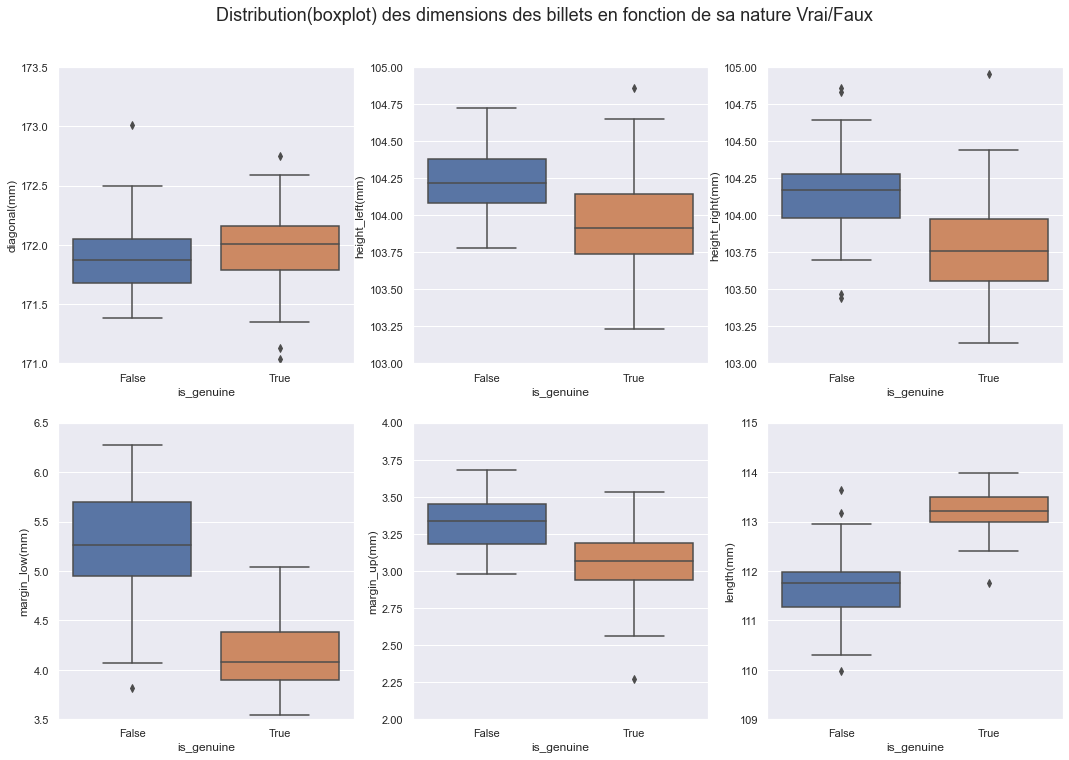

In [1815]:

fig = plt.figure(figsize=(18,12))
fig.suptitle("Distribution(boxplot) des dimensions des billets en fonction de sa nature Vrai/Faux", fontsize=18, y=0.95)

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

sns.boxplot(x="is_genuine", y="diagonal",data=notes, ax=ax1)
ax1.set_ylabel("diagonal(mm)")
ax1.set_ylim(171,173.5)
ax1.xaxis.set_tick_params(rotation=0)

sns.boxplot(x="is_genuine", y="height_left",data=notes, ax=ax2)
ax2.set_ylabel("height_left(mm)")
ax2.set_ylim(103,105)
ax2.xaxis.set_tick_params(rotation=0)

sns.boxplot(x="is_genuine", y="height_right",data=notes, ax=ax3)
ax3.set_ylabel("height_right(mm)")
ax3.set_ylim(103,105)
ax3.xaxis.set_tick_params(rotation=0)

sns.boxplot(x="is_genuine", y="margin_low",data=notes, ax=ax4)
ax4.set_ylabel("margin_low(mm)")
ax4.set_ylim(3.5,6.5)
ax4.xaxis.set_tick_params(rotation=0)

sns.boxplot(x="is_genuine", y="margin_up",data=notes, ax=ax5)
ax5.set_ylabel("margin_up(mm)")
ax5.set_ylim(2,4)
ax5.xaxis.set_tick_params(rotation=0)

sns.boxplot(x="is_genuine", y="length",data=notes, ax=ax6)
ax6.set_ylabel("length(mm)")
ax6.set_ylim(109,115)
ax6.xaxis.set_tick_params(rotation=0)

plt.savefig("Distribution_dimensions_billets_boxplot.jpg", dpi=300,orientation='landscape',bbox_inches="tight" ,pad_inches=0.5)
plt.show()

Je trace les graphiques de distribution des caractéristiques géométriques des billets de banque :

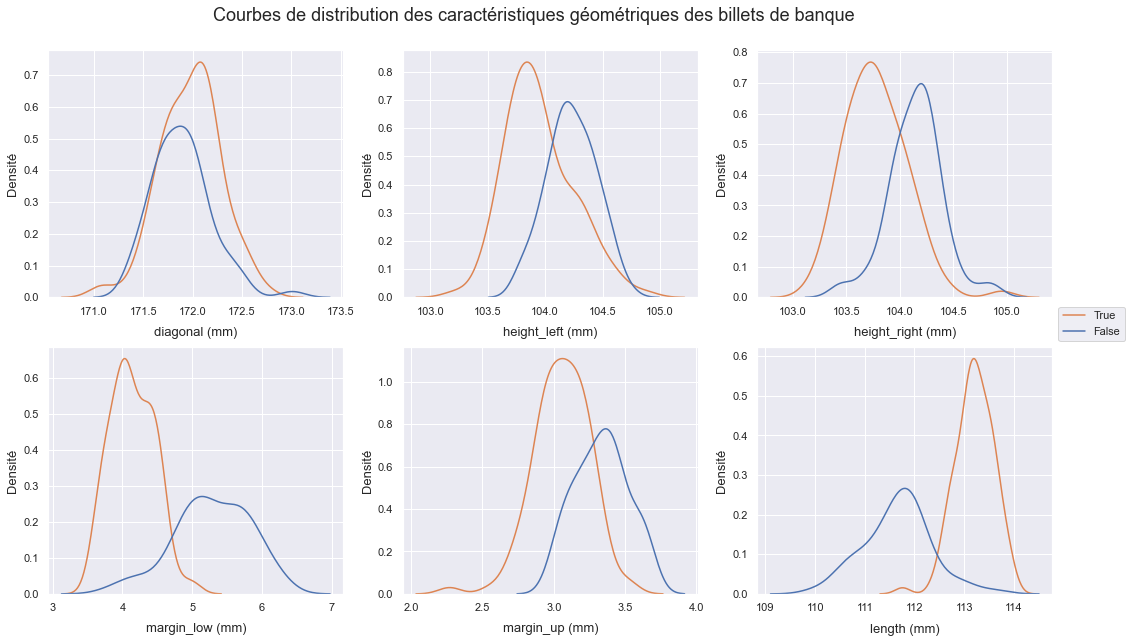

In [1816]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Courbes de distribution des caractéristiques géométriques des billets de banque',fontsize=18,y=0.94)  

a=sns.kdeplot(data=notes, x="diagonal", hue="is_genuine", legend=False, ax=axes[0,0]) 
a.set_xlabel('diagonal (mm)', fontsize=13,labelpad=10)
a.set_ylabel("Densité",fontsize=13)
a.xaxis.set_tick_params(rotation=0)

b=sns.kdeplot(data=notes, x="height_left", hue="is_genuine", legend=False,ax=axes[0, 1]) 
b.set_xlabel('height_left (mm)', fontsize=13,labelpad=10)
b.set_ylabel("Densité",fontsize=13)
b.xaxis.set_tick_params(rotation=0)

c=sns.kdeplot(data=notes, x="height_right", hue="is_genuine", legend=False,ax=axes[0, 2]) 
c.set_xlabel('height_right (mm)', fontsize=13,labelpad=10)
c.set_ylabel("Densité",fontsize=13)
c.xaxis.set_tick_params(rotation=0)

d=sns.kdeplot(data=notes, x="margin_low", hue="is_genuine", legend=False,ax=axes[1, 0]) 
d.set_xlabel('margin_low (mm)', fontsize=13,labelpad=10)
d.set_ylabel("Densité",fontsize=13)
d.xaxis.set_tick_params(rotation=0)

e=sns.kdeplot(data=notes, x="margin_up", hue="is_genuine", legend=False,ax=axes[1, 1]) 
e.set_xlabel('margin_up (mm)', fontsize=13,labelpad=10)
e.set_ylabel("Densité",fontsize=13)
e.xaxis.set_tick_params(rotation=0)

f=sns.kdeplot(data=notes, x="length", hue="is_genuine", legend=False,ax=axes[1, 2]) 
f.set_xlabel('length (mm)', fontsize=13,labelpad=10)
f.set_ylabel("Densité",fontsize=13)
f.xaxis.set_tick_params(rotation=0)

plt.savefig("Courbes de distribution des caractéristiques géométriques .jpg", dpi=300,orientation='landscape',bbox_inches="tight" ,pad_inches=0.5)
fig.legend(labels=["True","False"],loc="center right",bbox_to_anchor=(0.96,0.5))

plt.show()


On remarque que certaines variables présentent des distributions différentes selon que le billet soit "vrai" ou "faux".

Afin de vérifier qu'une variable est bien utile pour distinguer les "vrais" billets des "faux" billets, je compare les moyennes. Si les populations "vrai" et "faux" ont la meme moyenne alors la variable n'est pas pertinente pour la détection de faux billets.


Test de Student :

Hypothèse H0 : Toutes les populations ont la même moyenne


In [1817]:
from scipy import stats
from scipy.stats import levene

vrai=notes[notes["is_genuine"]==True]
faux=notes[notes["is_genuine"]==False]
columns = ['diagonal','height_left','height_right','margin_low','margin_up','length']

Tests_notes = pd.DataFrame( index = ['Student_Statistic','Student_pvalue','Student_Hypothèse H0'], columns = ['diagonal','height_left','height_right','margin_low','margin_up','length'])
for i in columns :
    vrai_i=vrai.loc[:,i]
    faux_i=faux.loc[:,i]
    stat_i,p_i=stats.ttest_ind(vrai_i,faux_i)
    Tests_notes.loc["Student_Statistic",i] = stat_i
    Tests_notes.loc["Student_pvalue",i] = p_i
    if p_i>0.05: Tests_notes.loc["Student_Hypothèse H0",i]="Non rejetée"
    else : Tests_notes.loc["Student_Hypothèse H0",i]="Rejetée"
Tests_notes

,diagonal,height_left,height_right,margin_low,margin_up,length
Student_Statistic,1.82229,-6.74697,-8.56499,-17.2886,-9.29587,18.9751
Student_pvalue,0.0701897,2.3342e-10,6.66525e-15,3.94015e-39,7.56739e-17,1.23482e-43
Student_Hypothèse H0,Non rejetée,Rejetée,Rejetée,Rejetée,Rejetée,Rejetée


L'ensemble des hypothèses H0 est rejetée excepté pour la variable "diagonal". 

La variable "diagonal" ne permet pas de détecter de manière exacte les faux billets. 

Regardons la relation "2 à 2" entre les variables quantitatives :

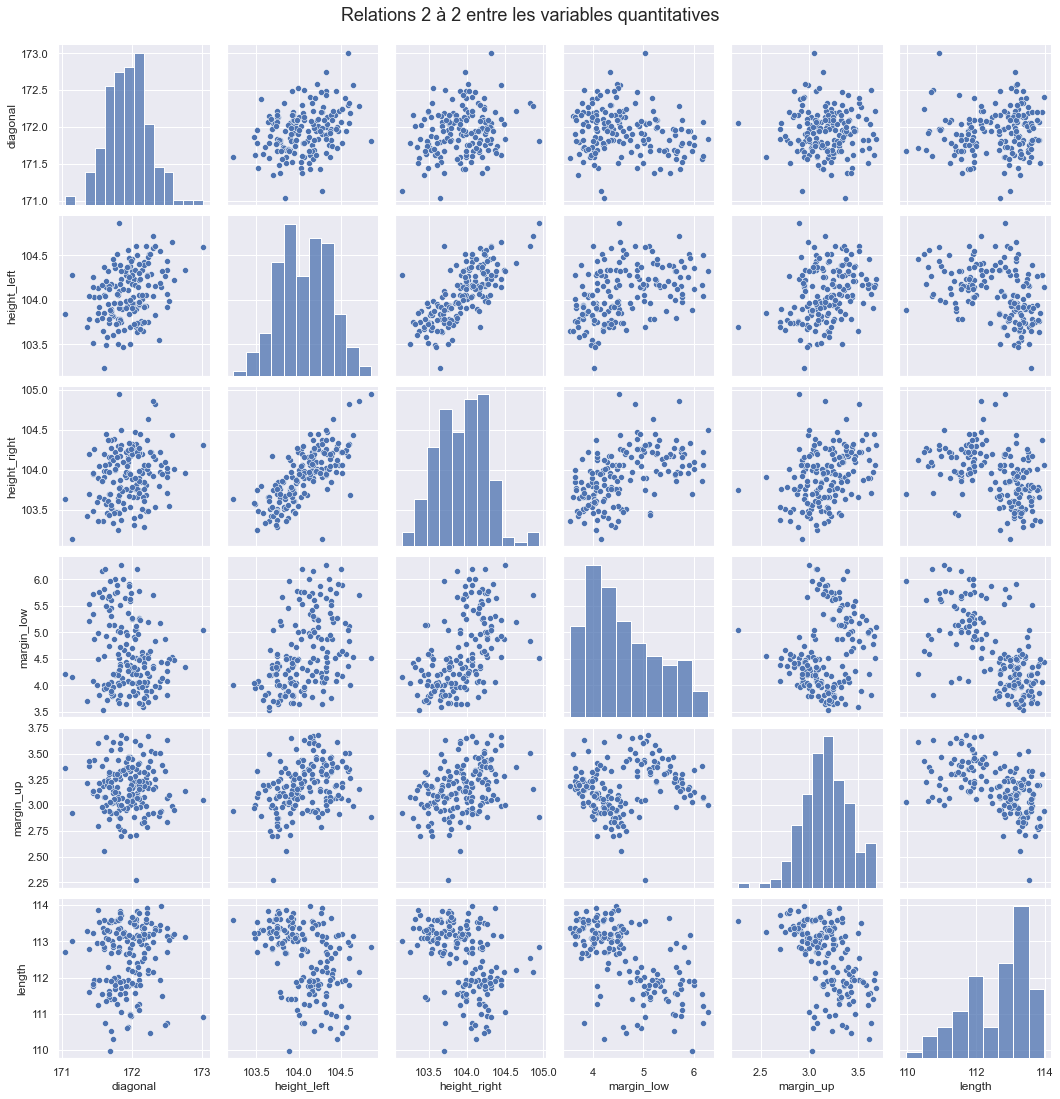

In [1818]:
notes_var_quanti=notes.drop(columns=["is_genuine"])

A=sns.pairplot(data = notes_var_quanti)
A.fig.suptitle("Relations 2 à 2 entre les variables quantitatives",fontsize=18, y=1.02)
plt.savefig("Relations 2 à 2 entre les variables quantitatives.jpg", dpi=300,orientation='landscape',bbox_inches="tight" ,pad_inches=0.5)
plt.show()

On remarque une relation qui semble linéaire entre "height_left" et "height_left" . 

Vérifions la force de la relation en affichant la matrice des corrélations de Pearson :

In [1826]:
notes_var_quanti.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.0,0.32,0.22,-0.18,-0.027,0.08
height_left,0.32,1.0,0.73,0.42,0.32,-0.42
height_right,0.22,0.73,1.0,0.51,0.37,-0.42
margin_low,-0.18,0.42,0.51,1.0,0.17,-0.64
margin_up,-0.027,0.32,0.37,0.17,1.0,-0.53
length,0.08,-0.42,-0.42,-0.64,-0.53,1.0


In [1827]:
# En partant de l'hypothèse nulle :
                    # H0 : Il n'y a pas de corrélation entre les deux variables
# On regarde le coefficient de Pearson entre les variables "height_right" et "height_left":

from scipy import stats

pearson_coef, p_value = stats.pearsonr(notes["height_right"], notes["height_left"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)  


Pearson Correlation Coefficient:  0.7343902682297873 and a P-value of: 4.4196175924217065e-30


Ici, le coefficient de Pearson est égal à -0.73. Ce qui montre une relation assez forte entre les deux variables.

La p-value dans ce test est extrêment faible (4.4e-30) donc nous pouvons rejeter l'hypothèse H0 et affirmer qu'il y a bien une relation entre height_right et height_left.

Nous pouvons voir cela en traçant la droite de regression entre les deux variables :

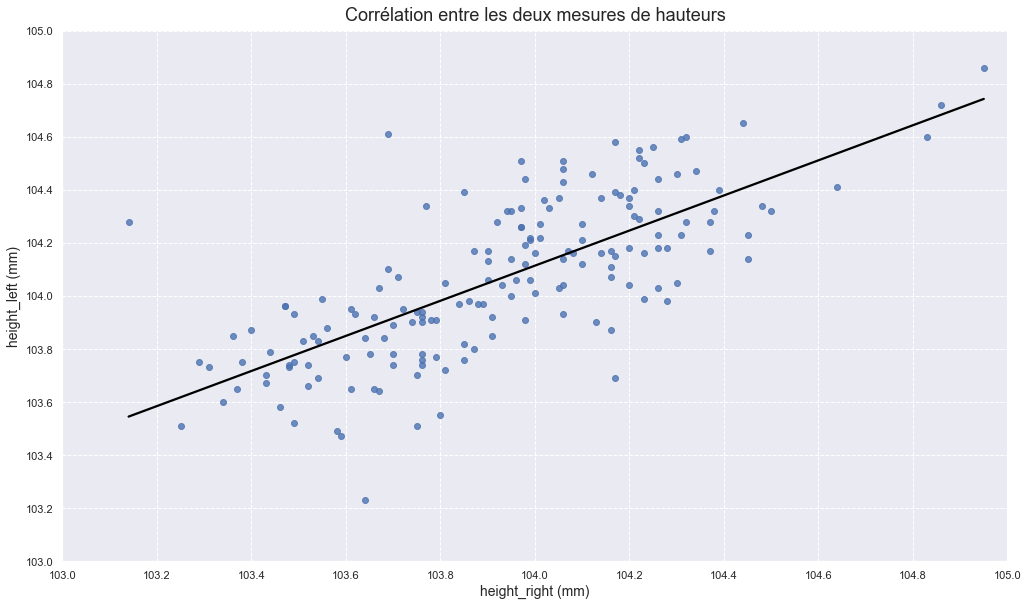

In [1828]:
sns.lmplot(x="height_right", y="height_left", data=notes, ci=None,line_kws={'color':'black'},height=8,aspect=1.75)
plt.title("Corrélation entre les deux mesures de hauteurs", fontsize=18, pad=10)
plt.xlabel('height_right (mm)', fontsize=14)
plt.ylabel('height_left (mm)', fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.xticks(np.arange(103,105.1,0.2))
plt.yticks(np.arange(103,105.1,0.2))
plt.savefig("Corrélation entre les deux mesures de hauteurs.jpg", dpi=300,orientation='landscape',bbox_inches="tight" ,pad_inches=0.5)
plt.show()

On constate sur la matrice de corrélation que le coefficient de Pearson entre "margin_low" et "length" est assez fort :

In [1829]:
# En partant de l'hypothèse nulle :
                    # H0 : Il n'y a pas de corrélation entre les deux variables
# On regarde le coefficient de Pearson entre les variables "margin_low" et "length":

from scipy import stats

pearson_coef, p_value = stats.pearsonr(notes["margin_low"], notes["length"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)  


Pearson Correlation Coefficient:  -0.6373516884716645 and a P-value of: 9.232575704825918e-21


Ici, le coefficient de Pearson est égal à -0.64. Ce qui montre une relation moyenne entre les deux variables.

La p-value dans ce test est extrêment faible (9.2e-21) donc nous pouvons rejeter l'hypothèse H0 et affirmer qu'il y a bien une relation entre margin_low et length.

Vérifions cela sur la droite de regresion ci-dessous :

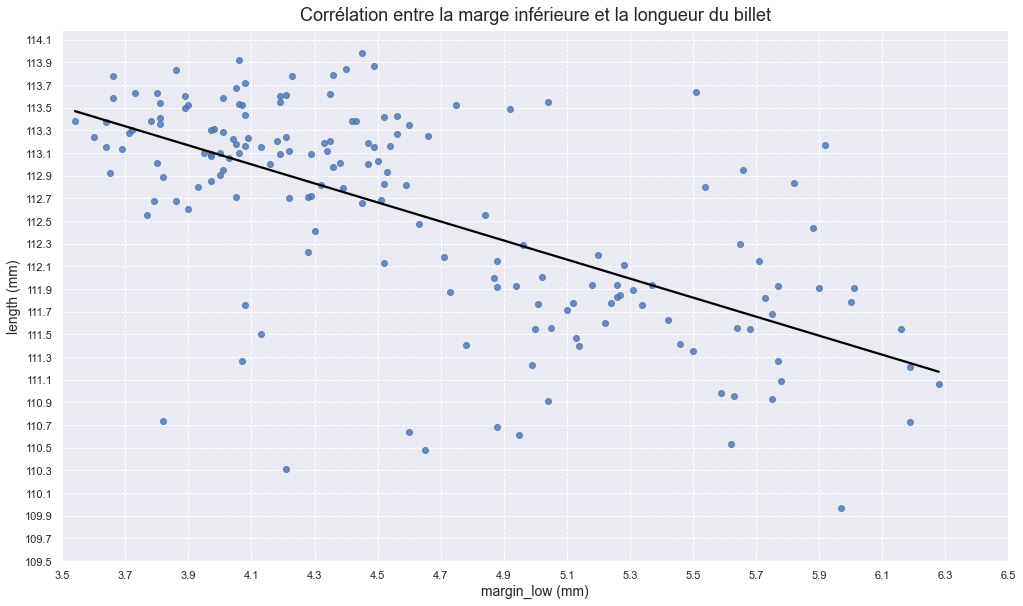

In [1830]:
sns.lmplot(x="margin_low", y="length", data=notes, ci=None,line_kws={'color':'black'},height=8,aspect=1.75)
plt.title("Corrélation entre la marge inférieure et la longueur du billet", fontsize=18, pad=10)
plt.xlabel('margin_low (mm)', fontsize=14)
plt.ylabel('length (mm)', fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.xticks(np.arange(3.5,6.6,0.2))
plt.yticks(np.arange(109.5,114.3,0.2))
plt.savefig("Corrélation entre la marge inférieure et la longueur du billet.jpg", dpi=300,orientation='landscape',bbox_inches="tight" ,pad_inches=0.5)
plt.show()

On remarque effectivement que les points sont assez éloignés de la droite . LA relation de linéarité n'est pas assez forte.

# Analyse en composantes principales

Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

    -analyse de l'éboulis des valeurs propres ;
    -représentation des variables par le cercle des corrélations ;
    -représentation des individus par les plans factoriels ;
    -analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.



## Eboulis des valeurs propres

In [1831]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing


# choix du nombre de composantes à calculer
n_comp =6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = notes[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

X = data_pca.values
names = notes.index 
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)



PCA(n_components=6)

In [1832]:
n = X.shape[0]
eigval = (n-1)/n*pca.explained_variance_
eigval

array([2.84687523, 1.31742636, 0.85407146, 0.51157773, 0.27676935,
       0.19327987])

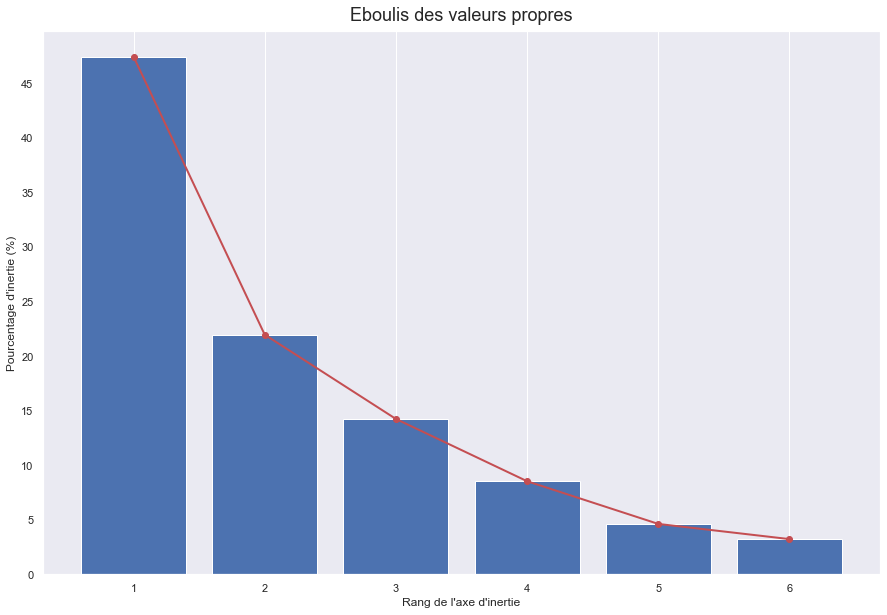

In [1833]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

sing_vals = np.arange(n_comp) + 1

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(sing_vals, scree, 'ro-', linewidth=2)
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie (%)")
    plt.title("Eboulis des valeurs propres", fontsize=18, pad=10)
    plt.savefig("Eboulis.jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
    plt.show(block=False)

# Eboulis des valeurs propres
plt.figure(figsize = (15,10))
plt.grid(axis='y')
plt.yticks(np.arange(0,101,5))
display_scree_plot(pca)

In [1834]:
scree = pca.explained_variance_ratio_*100

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : eigval,
        "% variance expliquée" : np.round(scree, decimals=1),
        "% cum. var. expliquée" : np.round(np.cumsum(scree), decimals=1)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.846875,47.4,47.4
1,Dim2,1.317426,22.0,69.4
2,Dim3,0.854071,14.2,83.6
3,Dim4,0.511578,8.5,92.2
4,Dim5,0.276769,4.6,96.8
5,Dim6,0.193280,3.2,100.0


On remarque que les deux premiers axes présentent des valeurs supérieures à 16.67%.

On choisira donc ces deux axes pour expliquer l'inertie totale du nuage de points.

La représentation des valeurs propres ( nouvelles variables) montre que les variables 1 et 2 expliquent 69.4% de la dispersion du nuage d'individus. Ceci est donc satisfaisant au regard de l'objectif de l'ACP.

## Cercle des corrélations

In [1835]:
p = X.shape[1]
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations (variables x facteurs)
print(corvar)

[[ 0.1236346   0.89486346 -0.08215244 -0.40034612 -0.11841965  0.05370861]
 [ 0.80229967  0.38938864  0.11345001  0.19887167  0.37663775  0.10205336]
 [ 0.8298348   0.27035382  0.14216371  0.32825381 -0.25620145 -0.21138296]
 [ 0.72725782 -0.36790977  0.4739162  -0.16202319 -0.1640912   0.24075808]
 [ 0.59482939 -0.1619761  -0.75887278  0.09680115 -0.10203101  0.15579811]
 [-0.78520903  0.36102241  0.11728832  0.41033916 -0.13384583  0.23034781]]


In [1836]:
#on affiche pour les deux premiers axes
coordvar=pd.DataFrame({'id':data_pca.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,diagonal,0.123635,0.894863
1,height_left,0.802300,0.389389
2,height_right,0.829835,0.270354
3,margin_low,0.727258,-0.367910
4,margin_up,0.594829,-0.161976
5,length,-0.785209,0.361022


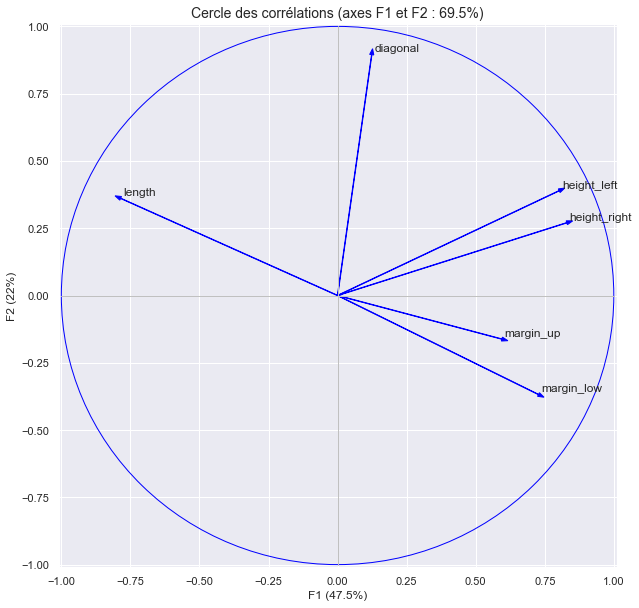

In [1837]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1.01,1.01)
axes.set_ylim(-1.01,1.01)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(data_pca.columns[j],(corvar[j,0]+0.01,corvar[j,1]+0.01))
 plt.arrow(0,0,corvar[j,0],corvar[j,1], color="blue",head_width = 0.015,width = 0.0015)

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.xlabel("F1 (47.5%)", fontsize=12)
plt.ylabel("F2 (22%)", fontsize=12)
plt.title("Cercle des corrélations (axes F1 et F2 : 69.5%)", fontsize=14)
plt.grid(True)
plt.savefig("Cercle des corrélations.jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show()

Les variables "height_left","height_right", "margin_low" et "length" sont bien corrélées à F1 tandis que la variable "diagonal" est très bien corrélée à F2. 

La variable "margin_up" n'est pas très bien représentée sur le plan malgré une très bonne corrélation à F1(faible angle).

Comme on l'a vu précédemment "height_left" et "height_right" sont très bien corrélées entre elles.

## Projection des individus sur le 1er plan factoriel 

In [1838]:
# J'ai choisi d'utiliser des données centrée réduite malgré les que l'ensemble des dimensions soient en millimètres, car l'ordre de grandeur des variables mesurées est trop différent.

notes_var_quanti_pca = pca.transform(X_scaled)

#Transformation en DataFrame pandas
notes_var_quanti_pca_df = pd.DataFrame({
    "Dim1" : notes_var_quanti_pca[:,0], 
    "Dim2" : notes_var_quanti_pca[:,1],
    "is_genuine" : notes["is_genuine"],
})

# Résultat (premières lignes)
notes_var_quanti_pca_df.reset_index()

,index,Dim1,Dim2,is_genuine
0,0,2.153639,1.599709,True
1,1,-2.110416,-0.526039,True
2,2,-1.973152,-0.048102,True
3,3,-2.059795,-0.089105,True
4,4,-2.403180,0.412170,True
...,...,...,...,...
165,165,2.478626,0.189974,False
166,166,2.585331,2.914472,False
167,167,2.067245,0.845602,False
168,168,0.739257,-0.972965,False


In [1839]:
palette = plt.get_cmap("tab20c")

couleurs = dict(zip(notes_var_quanti_pca_df["is_genuine"].drop_duplicates(), palette(range(2))))
couleurs

{True: array([0.19215686, 0.50980392, 0.74117647, 1.        ]),
 False: array([0.41960784, 0.68235294, 0.83921569, 1.        ])}

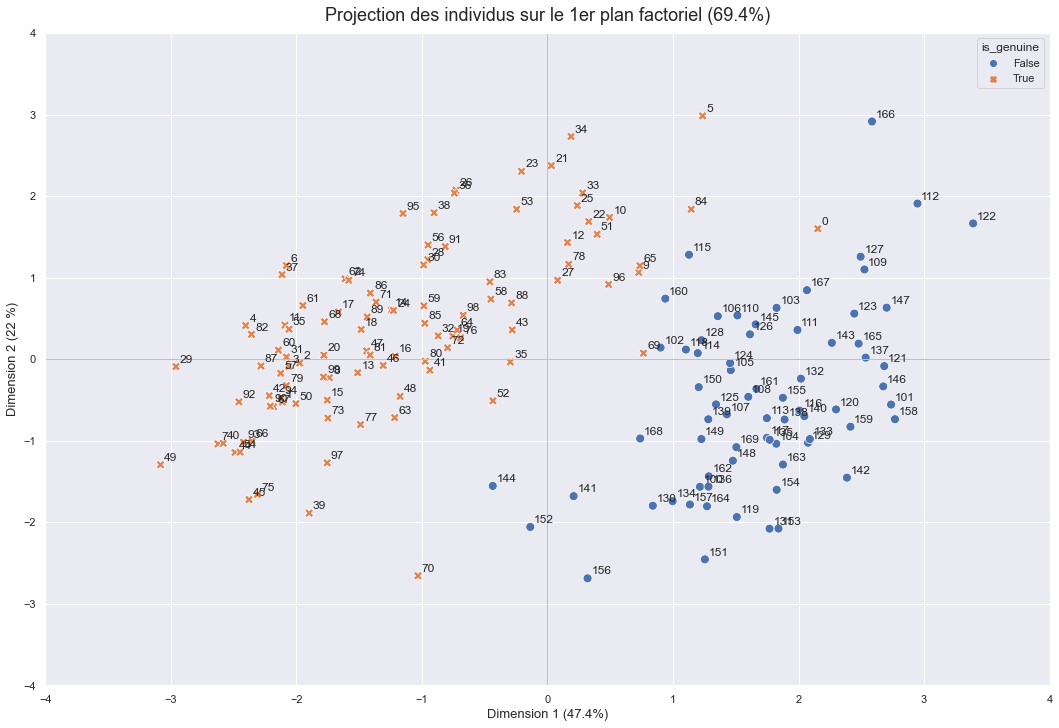

In [1840]:
#faire un graphique en coloriant les points

fig, ax = plt.subplots(figsize=(18,12))
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

x=notes_var_quanti_pca_df["Dim1"]
y=notes_var_quanti_pca_df["Dim2"]
labs=notes_var_quanti_pca_df.index

sns.scatterplot(data=notes_var_quanti_pca_df, x = "Dim1", y = "Dim2",s=80,hue="is_genuine",style="is_genuine", c = [couleurs[p] for p in notes_var_quanti_pca_df["is_genuine"]])

# Loop for annotation of all points
for i,txt in enumerate (labs):
    plt.annotate(txt, (x[i]+0.03, y[i]+0.05))
    
#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)    
plt.xlabel("Dimension 1 (47.4%)", fontsize=13) 
plt.ylabel("Dimension 2 (22 %)", fontsize=13)
plt.title("Projection des individus sur le 1er plan factoriel (69.4%)",fontsize=18,pad=12)
plt.savefig("Projection des individus sur le 1er plan factoriel (69.4%).jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show()

La projection sur le premier plan factoriel met bien en lumière les deux clusters "Vrais billets" et "Faux billets". 

On voit que les vrais billets sont plutot à gauche de l'axe F1 et les faux billets à droite de l'axe F1.


## Qualité de représentation des individus

In [1841]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#transformation – centrage-réduction
Z = StandardScaler().fit_transform(notes_var_quanti)
print(Z) 

[[-0.42834385  2.6694537   3.09656321 -0.13159013 -1.18987367  0.28163308]
 [-0.88755932 -1.09769709 -0.69125444 -0.86012554 -1.27473985  0.78069736]
 [-0.36274164 -1.03042654 -0.50943919 -0.30301023 -1.23230676  1.37740465]
 ...
 [ 1.73652911  0.68497248  0.52084721  0.38267015  0.67718214 -2.05094997]
 [-0.39554274 -0.32408577 -0.1458087   0.16839504  1.61071005 -0.75989238]
 [ 0.06367273 -0.22317994  0.06630909  1.45404575  0.38015054 -1.74717171]]


In [1842]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':notes_var_quanti.index,'d_i':di, 'is_genuine':notes.is_genuine}))


      ID        d_i  is_genuine
0      0  18.410598        True
1      1   5.444799        True
2      2   4.960527        True
3      3   4.805719        True
4      4  18.039567        True
..   ...        ...         ...
165  165   7.673233       False
166  166  20.625650       False
167  167   8.567410       False
168  168   3.482926       False
169  169   5.369633       False

[170 rows x 3 columns]


In [1843]:
coord=pca.fit_transform(Z)
coord

array([[ 2.15363875,  1.59970945,  1.78745079,  2.43346523,  0.69968952,
        -1.26770217],
       [-2.11041589, -0.52603892,  0.54256277,  0.34454951,  0.0674404 ,
        -0.54460079],
       [-1.97315242, -0.04810178,  0.85871563,  0.37481231, -0.4248861 ,
         0.08048667],
       ...,
       [ 2.06724502,  0.84560244, -0.61028227, -1.71417169,  0.1169579 ,
        -0.50433787],
       [ 0.73925685, -0.97296457, -1.35977212, -0.19173617, -0.24355701,
         0.21142914],
       [ 1.50499242, -1.07972486,  0.18888855, -1.34755225, -0.2891493 ,
        -0.06034599]])

In [1844]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
quali_cos2=pd.DataFrame({'id':notes_var_quanti.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'sum':cos2[:,0]+cos2[:,1],'is_genuine':notes.is_genuine})
quali_cos2.mean()

id            84.500000
COS2_1         0.472068
COS2_2         0.214943
sum            0.687011
is_genuine     0.588235
dtype: float64

In [1845]:
quali_cos2.tail(70)

,id,COS2_1,COS2_2,sum,is_genuine
100,100,0.265167,0.439938,0.705105,False
101,101,0.908310,0.037607,0.945917,False
102,102,0.327264,0.008077,0.335342,False
103,103,0.770969,0.091458,0.862427,False
104,104,0.662598,0.214623,0.877221,False
...,...,...,...,...,...
165,165,0.800651,0.004703,0.805355,False
166,166,0.324059,0.411824,0.735884,False
167,167,0.498809,0.083461,0.582270,False
168,168,0.156908,0.271800,0.428709,False


In [1846]:
Quali_mean=quali_cos2.groupby("is_genuine").mean()
Quali_mean

,id,COS2_1,COS2_2,sum
is_genuine,,,,
False,134.5,0.496250,0.198254,0.694504
True,49.5,0.455141,0.226626,0.681766


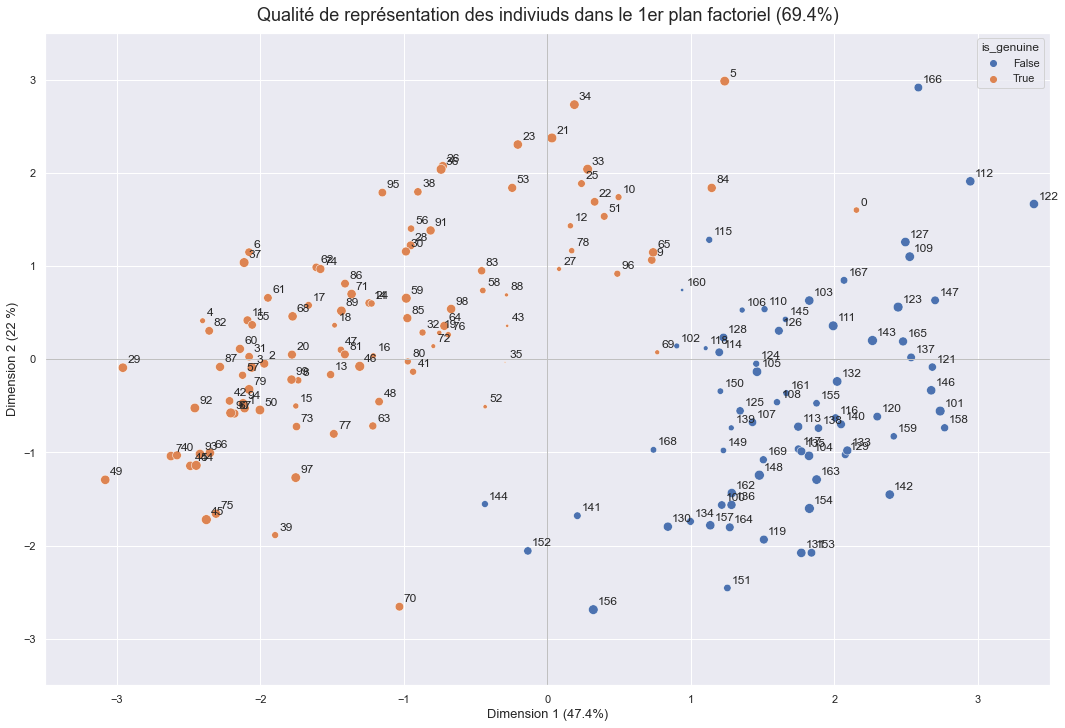

In [1847]:
#faire un graphique en coloriant les points

fig, ax = plt.subplots(figsize=(18,12))
ax.set_xlim(-3.5,3.5)
ax.set_ylim(-3.5,3.5)

x=notes_var_quanti_pca_df["Dim1"]
y=notes_var_quanti_pca_df["Dim2"]
labs=notes_var_quanti_pca_df.index
s1=quali_cos2["sum"]

sns.scatterplot(data=notes_var_quanti_pca_df, x = "Dim1", y = "Dim2",s=s1*100, hue="is_genuine", c = [couleurs[p] for p in notes_var_quanti_pca_df["is_genuine"]])
# Loop for annotation of all points
for i,txt in enumerate (labs):
    plt.annotate(txt, (x[i]+0.03, y[i]+0.05))
    
#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)    
plt.xlabel("Dimension 1 (47.4%)", fontsize=13) 
plt.ylabel("Dimension 2 (22 %)", fontsize=13)
plt.title("Qualité de représentation des indiviuds dans le 1er plan factoriel (69.4%)",fontsize=18,pad=12)
plt.savefig("Qualité de représentation des indiviuds dans le 1er plan factoriel (69.4%).jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show()

La qualité de représentation des indiviuds indiquent la qualité de projection sur le premier plan. 

Si deux individus sont bien projetés, alors leur distance en projection est proche de leur distance dans l'espace.

Deux points proches l'un de l'autre sur le graphique peuvent correspondrent à des individus éloignés l'un de l'autre. 

Par exemple, les billets 69 et 102 sont des billets éloignés l'un de l'autre (l'un est vrai et  l'autre faux) mais proches sur le plan .

Ils ont un COS2 total faible (billet 69=0.241648 et billet 102=0.335342) ce qui signifie qu'ils sont mal projetés 


## Contribution des individus aux axes

In [1848]:
# contribution des individus aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

CTR=pd.DataFrame({'id':notes_var_quanti.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'is_genuine':notes.is_genuine})
CTR.describe()

,id,CTR_1,CTR_2
count,170.000000,170.000000,170.000000
mean,84.500000,0.005882,0.005882
std,49.218899,0.004789,0.007819
min,0.000000,0.000002,0.000002
25%,42.250000,0.001896,0.000591
50%,84.500000,0.004691,0.002383
75%,126.750000,0.008933,0.008258
max,169.000000,0.023758,0.039736


In [1849]:
CTR.mean()

id            84.500000
CTR_1          0.005882
CTR_2          0.005882
is_genuine     0.588235
dtype: float64

In [1850]:
CTR.head()

,id,CTR_1,CTR_2,is_genuine
0,0,0.009584,0.011426,True
1,1,0.009203,0.001236,True
2,2,0.008045,0.000010,True
3,3,0.008767,0.000035,True
4,4,0.011933,0.000759,True


Contribution importante si CTR > 4x0.005882=0.023528

Individu sur représenté si CTR > 0.25.  ===> Retirer l'individu 

In [1851]:
# J'identifie le nombre d'individus ayant une contribution importante

CTR_importante= CTR[(CTR["CTR_1"]>0.023528) | (CTR["CTR_2"]>0.023528) ]
CTR_importante

,id,CTR_1,CTR_2,is_genuine
5,5,0.003155,0.039736,True
21,21,0.000002,0.025151,True
23,23,0.000088,0.023682,True
34,34,0.000073,0.033302,True
70,70,0.002197,0.031516,True
122,122,0.023758,0.012372,False
151,151,0.003251,0.026922,False
156,156,0.000211,0.032264,False
166,166,0.013811,0.037927,False


Aucun individu n'est sur-représenté. 

Quelques individus ont une contribution importante à l'axe F1(1 billet) et surtout F2(8 billets). 

Je décide de garder l'ensemble de mes individus car c'est l'axe F1 qui différencie les vrais billets des faux billets comme vu dans la projection sur le 1er plan (§2.3).

# Algorithme de Classification

## Algorithme de classification K-means

In [1956]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition


# Nombre de clusters souhaités
n_clust = 2

# selection des colonnes à prendre en compte 
data_pca = notes[["diagonal","height_left","height_right","margin_low","margin_up","length"]]
X=data_pca.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

KMeans(n_clusters=2)

In [1957]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_
clusters

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [1958]:
notes["Cluster_KM"]=clusters
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster_KM
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
1,True,171.67,103.74,103.70,4.01,2.87,113.29,1
2,True,171.83,103.76,103.76,4.40,2.88,113.84,1
3,True,171.80,103.78,103.65,3.73,3.12,113.63,1
4,True,172.05,103.70,103.75,5.04,2.27,113.55,1
...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,0
166,False,173.01,104.59,104.31,5.04,3.05,110.91,0
167,False,172.47,104.27,104.10,4.88,3.33,110.68,0
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0


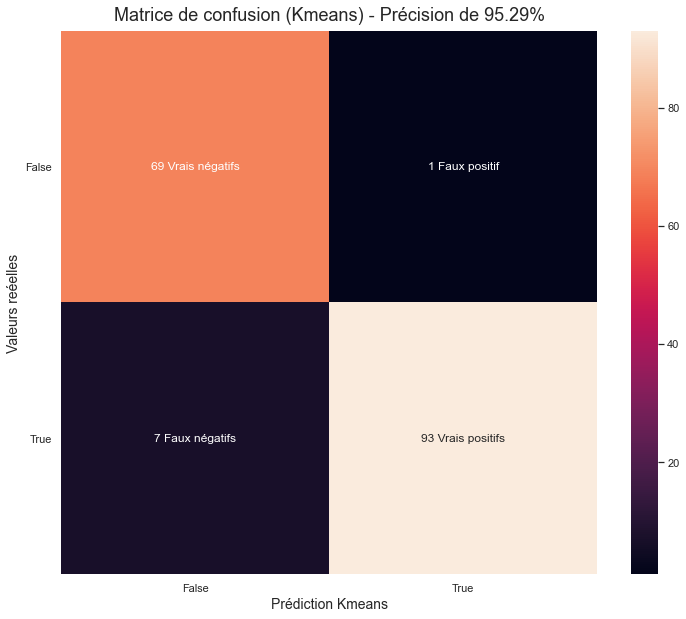

In [1963]:
plt.figure(figsize=[12,10])
plt.subplot(111)

Matrix_confusion = pd.crosstab(notes["is_genuine"],notes["Cluster_KM"])
labels=np.array([["69 Vrais négatifs","1 Faux positif"],["7 Faux négatifs","93 Vrais positifs"]], dtype=str)
sns.heatmap(Matrix_confusion, annot=labels,annot_kws={'size':12},fmt="s")
plt.xticks(np.arange(0,2)+0.5,labels=["False","True"])
plt.yticks(rotation=0)
plt.xlabel("Prédiction Kmeans", fontsize=14)
plt.ylabel("Valeurs reéelles", rotation=90, fontsize=14)
plt.title("Matrice de confusion (Kmeans) - Précision de 95.29%", fontsize=18, pad= 10)
plt.savefig("Matrice de confusion (Kmeans).jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show()

In [1964]:
Faux_neg=notes[(notes["is_genuine"]==True)&(notes["Cluster_KM"]==0)]
Faux_neg

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster_KM
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
5,True,172.57,104.65,104.44,4.54,2.99,113.16,0
9,True,172.14,104.34,104.20,4.63,3.02,112.47,0
65,True,172.16,104.43,104.06,4.51,3.19,112.69,0
69,True,171.94,104.11,104.16,4.08,3.35,111.76,0
84,True,172.30,104.58,104.17,4.36,3.33,112.98,0
96,True,172.00,104.32,104.26,4.53,3.04,112.93,0


In [1965]:
Faux_pos=notes[(notes["is_genuine"]==False)&(notes["Cluster_KM"]==1)]
Faux_pos

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster_KM
144,False,171.56,103.8,103.87,5.66,2.98,112.95,1


In [1966]:
notes_modif=notes.copy()
notes_modif.iloc[[0,5,9,65,69,84,96],7]=2
notes_modif.iloc[144,7]=3
notes_modif["Cluster_KM_Prediction"]=notes_modif["Cluster_KM"].map({0:'Vrais négatifs',1:'Vrais positifs',2:'Faux négatifs',3:'Faux positifs'},na_action=None)
notes_modif

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster_KM,Cluster_KM_Prediction
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2,Faux négatifs
1,True,171.67,103.74,103.70,4.01,2.87,113.29,1,Vrais positifs
2,True,171.83,103.76,103.76,4.40,2.88,113.84,1,Vrais positifs
3,True,171.80,103.78,103.65,3.73,3.12,113.63,1,Vrais positifs
4,True,172.05,103.70,103.75,5.04,2.27,113.55,1,Vrais positifs
...,...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,0,Vrais négatifs
166,False,173.01,104.59,104.31,5.04,3.05,110.91,0,Vrais négatifs
167,False,172.47,104.27,104.10,4.88,3.33,110.68,0,Vrais négatifs
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0,Vrais négatifs


Les faux positifs ont des caractéristiques géométriques proches de vrais billets et les faux négatifs ont des caractéristiques géométriques proches de faux billets.
Ceci est bien visible sur la projection des individus dans le 1er plan factoriel.

## Projection des individus  dans le premier plan factoriel 

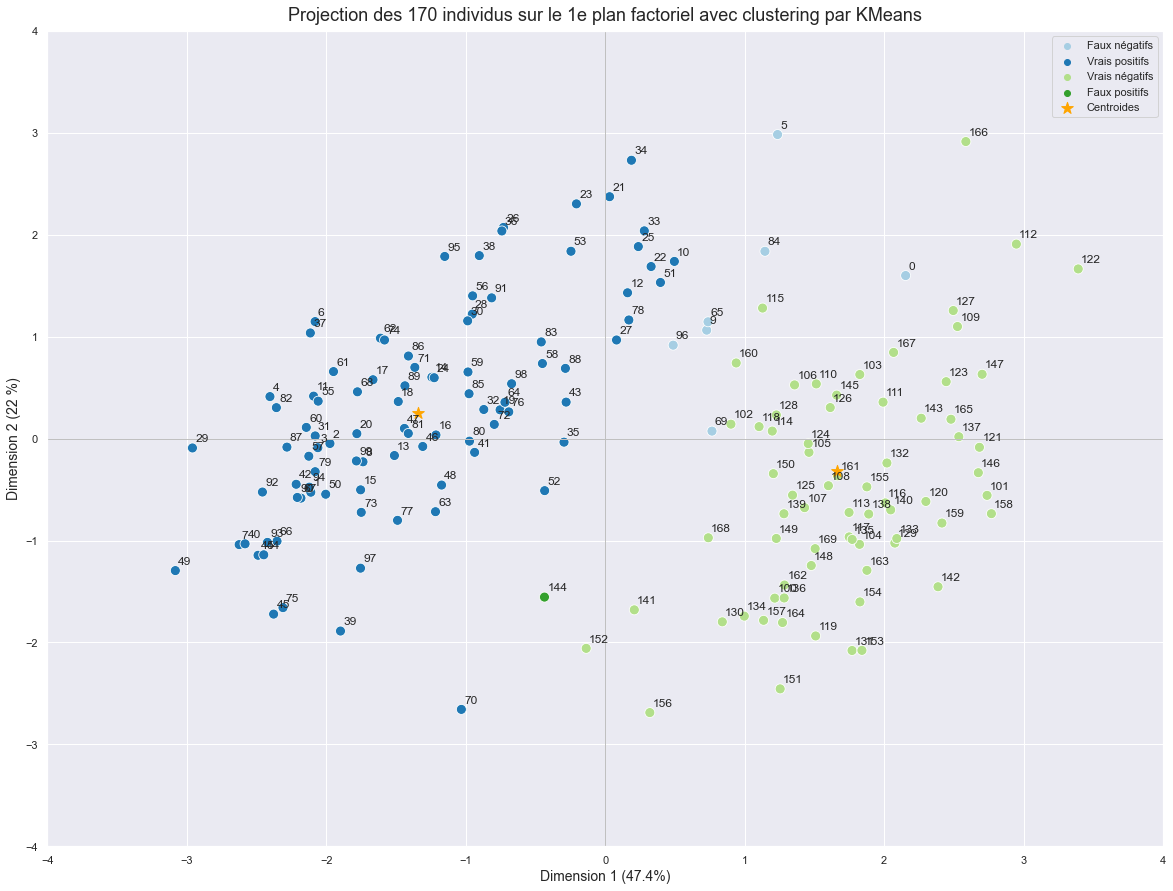

In [1968]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

# Affichage du clustering par projection des individus sur le premier plan factoriel

sns.scatterplot(x="Dim1", y="Dim2", hue=notes_modif["Cluster_KM_Prediction"], data=notes_var_quanti_pca_df, palette='Paired', s=100)
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1], marker = '*', s = 150,color = 'orange',label = 'Centroides')
plt.legend(loc="best")

labs=notes_var_quanti_pca_df.index
# Loop for annotation of all points
for i,txt in enumerate (labs):
    plt.annotate(txt, (x[i]+0.02, y[i]+0.06))

plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)    
plt.xlabel("Dimension 1 (47.4%)", fontsize=14) 
plt.ylabel("Dimension 2 (22 %)", fontsize=14)
plt.title("Projection des {} individus sur le 1e plan factoriel avec clustering par KMeans".format(X_projected.shape[0]),fontsize=18, pad= 10)
plt.savefig("Projection des 170 individus sur le 1e plan factoriel avec clustering par KMeans.jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show(block=False)


La répartition des clusters calculés par l'algorithme Kmeans est fidèle à la projection de l’ACP.

Les "Faux négatifs" et "Faux positifs" identifiés sont sur la frontière Vrai/Faux de la projection.

# Régression Logistique

## Modélisation des données

### Représentation graphique de la modélisation avec la variable "margin_low"

Afin de modéliser les données à l'aide d'une regression logistique, j'ai choisi d'utiliser la variable "margin_low": 


In [1969]:
Data_GLM= notes.loc[:,["is_genuine","margin_low"]]
Data_GLM

,is_genuine,margin_low
0,True,4.52
1,True,4.01
2,True,4.40
3,True,3.73
4,True,5.04
...,...,...
165,False,5.24
166,False,5.04
167,False,4.88
168,False,4.73


In [1970]:
Data_GLM.replace(to_replace=True,value=1,inplace=True)
Data_GLM = Data_GLM.astype({"is_genuine": int})
Data_GLM

,is_genuine,margin_low
0,1,4.52
1,1,4.01
2,1,4.40
3,1,3.73
4,1,5.04
...,...,...
165,0,5.24
166,0,5.04
167,0,4.88
168,0,4.73


Les résultats de la régression logistique sont représentés ci-dessous: 

In [1971]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg_log1 = smf.glm('is_genuine ~ margin_low', data=Data_GLM, family=sm.families.Binomial()).fit()

print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                            GLM   Df Residuals:                      168
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.056
Date:                Wed, 22 Sep 2021   Deviance:                       80.112
Time:                        12:13:45   Pearson chi2:                     245.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4357      4.136      6.391      0.0

On obtient les paramètres estimés : $\hat{\beta}_{1}=26.4357$ et $\hat{\beta}_{2}=-5.6461$. 

Je les enregistre :

In [1972]:
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]

Dans le but de tracer la courbe logistique entre les abscisses $x=3.54$ et $x=6.28$, on définit une séquence de 3.54 à 6.28 par pas de 170, puis on la place dans la variable x. On calcule ensuite les ordonnées de la courbe, grâce à l'expression de la courbe sigmoïde en S :
<br><br><center><font size="4">$P(x) = \frac{e^{\beta_{1}+\beta_{2}x}}{1+e^{\beta_{1}+\beta_{2}x}}$</font></center>

Nous plaçons ces ordonnées dans la variable y. Enfin, avec x et y, nous créons un dataframe :

In [1973]:
x = np.linspace(start=3.54, stop=6.28, num=170)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'margin_low': x, 'prop_is_genuine': y})

On superpose ainsi la courbe logistique au nuage de points représentant la variable "is_genuine" en fonction de la dimension "margin_low" :

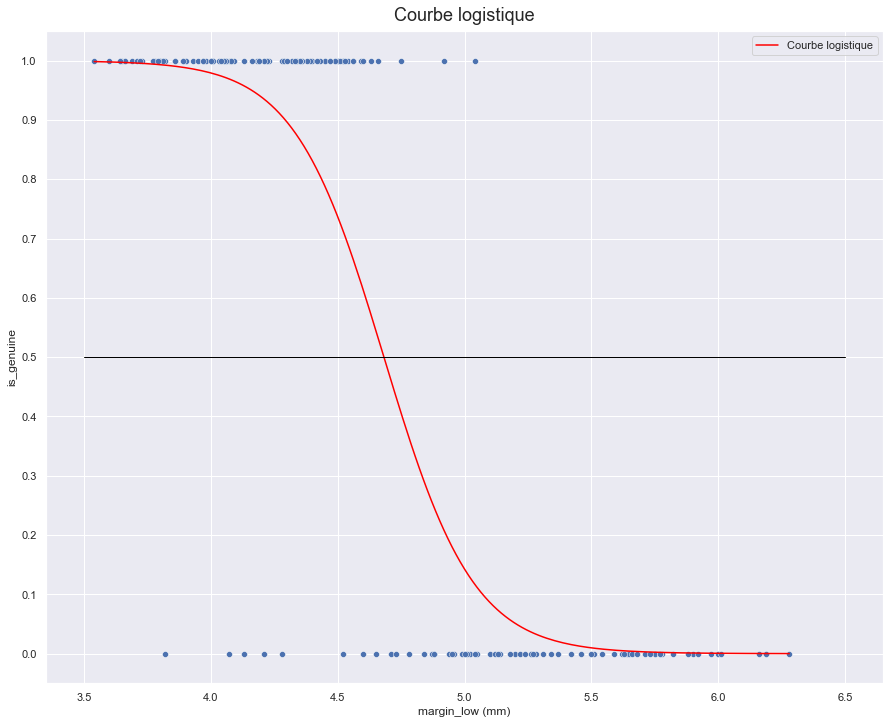

In [1977]:
plt.figure(figsize=(15,12))
sns.scatterplot(x="margin_low", y="is_genuine", data=Data_GLM)
plt.plot(reg_log['margin_low'], reg_log['prop_is_genuine'], color='red', label='Courbe logistique')
plt.yticks(np.arange(0,1.1,0.1))
plt.plot([3.5,6.5],[0.5,0.5],color='black',linestyle='-',linewidth=1)
plt.xlabel("margin_low (mm)")
plt.legend()
plt.title("Courbe logistique", fontsize=18, pad=10)
plt.savefig("Courbe logistique (variable 'is_genuine' en fonction de la dimension 'margin_low').jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show() 

## Regression logistique sur l'ensemble des données

### Création du modèle :

Réalisons une régression logistique de l'ensemble des variables. J'utilise pour cela, la librairie Scikit-learn.

Je sépare mes données en deux jeux, l'un servira d'entrainement et l'autre de test :

In [1978]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 

y=notes['is_genuine']
X=notes.loc[:,["diagonal","height_left","height_right",'margin_low','margin_up','length']]

#fractionner dataset (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)
print('Train:',X_train.shape, 'Test:',X_test.shape)

#Centrage et réduction
scaler=StandardScaler()# crée un scaler
scaler.fit(X_train) # calcule mu et sigma sur X_train uniquement 
X_train_scaled=scaler.transform(X_train) 
X_train_scaled=pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_train.columns)

X_test_scaled=scaler.transform(X_test) 
X_test_scaled=pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)

#instanciation du modèle
modele_regLog = linear_model.LogisticRegression()
#training
modele_regLog.fit(X_train_scaled, y_train)


#calcule de précision du jeu d'entrainement

print("La précision du modèle sur le jeu d'entrainement:{:.3f}".format(modele_regLog.score(X_train_scaled, y_train)))

#calcule de précision du jeu de test
print("La précision du modèle sur le jeu de test:{:.3f}".format(modele_regLog.score(X_test_scaled, y_test)))


Train: (136, 6) Test: (34, 6)
La précision du modèle sur le jeu d'entrainement:0.993
La précision du modèle sur le jeu de test:1.000


La précision de mon modèle sur la jeu d'entrainemennt est de 99,3% et 100% sur mon jeu de test.

### Calcul des coefficients Beta de mon modèle

Nous avons vu, dans le cas d'une régression logistique avec une seile variable que : <br><br><center><font size="4">$P(x) = \frac{e^{\beta_{1}+\beta_{2}x}}{1+e^{\beta_{1}+\beta_{2}x}}$</font></center>

Dans une situation de variables explicatives multiples l’équation se généralise en :

<br><br><center><font size="4">$P(x) = \frac{e^{\beta_{0}+\beta_{1}X+...+\beta_{n}Xn}}{1+e^{\beta_{0}+\beta_{1}X+...+\beta_{n}Xn}}=\frac{𝑒𝑥𝑝(∑𝛽𝑋)}{1+𝑒𝑥𝑝(∑𝛽𝑋)}$</font></center>

Le modèle précédent n’est pas linéaire dans l’expression des paramètres beta_X puisque la probabilité de réalisation ne s’exprime pas comme une addition des effets des différentes variables explicatives.

Pour obtenir un tel modèle (linéaire dans ses paramètres), il est nécessaire de passer par une transformation logit :
                <br><br><center><font size="4">$𝑙𝑜𝑔𝑖𝑡(𝑝) = 𝑙𝑜𝑔(\frac{𝑝}{1−𝑝}) = \sum_{j=1}^{n}𝛽𝑗𝑋𝑖𝑗$</font></center>
Cette transformation logit est la fonction de lien qui permet de mettre en relation la probabilité de réalisation (bornée entre 0 et 1), et la combinaison linéaire de variable explicatives.

Nous pouvons à présent calculer les paramètres Beta du modèle obtenu :

In [1979]:
Coef_Beta=pd.DataFrame(modele_regLog.coef_[0], index=X_train_scaled.columns,columns=["beta"])
Coef_Beta

,beta
diagonal,0.117690
height_left,-0.232407
height_right,-0.474655
margin_low,-2.163106
margin_up,-1.452614
length,1.726739


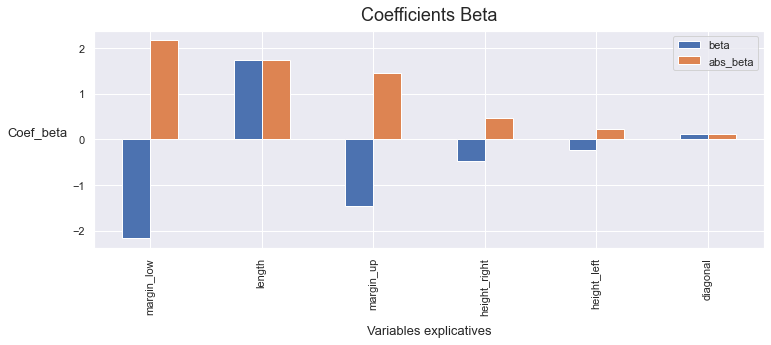

In [1988]:
Coef_Beta['abs_beta'] = Coef_Beta['beta'].abs() # calcul des valeurs absolues des beta
Coef_Beta = Coef_Beta.sort_values(by='abs_beta', ascending=False) # tri par valeurs absolues
Coef_Beta.plot.bar(figsize=(12,4))
plt.xlabel("Variables explicatives", fontsize=13, labelpad=10)
plt.ylabel("Coef_beta", fontsize=13, rotation=0, labelpad=35)
plt.title("Coefficients Beta", fontsize=18, pad=10)
plt.savefig("Coefficients Beta.jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
plt.show()

Plus le coefficient en valeur absolu est élevé et plus il a une influence sur le modèle.

"margin_low", "length" et "margin_up" influencent fortement le modèle.

Je peux donc réaliser mes prédictions avec ces 3 variables seulement.


### Calcul de la précision du modèle sur le jeu de données initiales

In [1985]:
#Calcul de  la précision de mon modèle sur le  jeu de données initiales "notes":
X_notes_scaled=scaler.transform(X)
print("La précision du modèle sur le jeu de données initiales 'notes' :{:.3f}".format(modele_regLog.score(X_notes_scaled, y)))


La précision du modèle sur le jeu de données initiales 'notes' :0.994


### Prédiction du jeu de données "example.csv"

In [1989]:
dataset_new=pd.read_csv("example.csv",sep=",")
dataset_new

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [1990]:
X_new=dataset_new[['diagonal',"height_left","height_right",'margin_low','margin_up','length']]
X_new_scaled=scaler.transform(X_new)

In [1991]:
proba_new=modele_regLog.predict_proba(X_new_scaled)
proba_new

array([[0.95780856, 0.04219144],
       [0.9953284 , 0.0046716 ],
       [0.98525187, 0.01474813],
       [0.04845643, 0.95154357],
       [0.0023502 , 0.9976498 ]])

In [1992]:
Score=proba_new[:,1].round(4)*100 # On extrait la probabilité d'obtenir un vrai billet 
dataset_new["prediction(%)"]=Score
dataset_new["is_genuine"]=np.where(dataset_new["prediction(%)"]>=50, "Oui", "Non") # J'ajoute une colonne "is_genuine" qui spécifie si le billet est vrai
dataset_new

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction(%),is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,4.22,Non
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.47,Non
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,1.47,Non
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,95.15,Oui
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,99.76,Oui


### Optimisation de mon modèle 

J'ai identifié précédemment les 3 variables qui avaient le plus d'influence sur mon modèle. 

Je décide donc d'utiliser ces 3 variables pour optimiser mon modèle.

In [1993]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 

y=notes['is_genuine']
X=notes.loc[:,['margin_low','margin_up','length']]

#fractionner dataset (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)
print('Train:',X_train.shape, 'Test:',X_test.shape)

#Centrage et réduction
scaler=StandardScaler()# crée un scaler
scaler.fit(X_train) # calcule mu et sigma sur X_train uniquement 
X_train_scaled=scaler.transform(X_train) 
X_train_scaled=pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_train.columns)

X_test_scaled=scaler.transform(X_test) 
X_test_scaled=pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)

#instanciation du modèle
modele_regLog = LogisticRegression()
#training
modele_regLog.fit(X_train_scaled, y_train)


#calcule de précision du jeu d'entrainement

print("La précision du modèle sur le jeu d'entrainement:{:.3f}".format(modele_regLog.score(X_train_scaled, y_train)))

#calcule de précision du jeu de test
print("La précision du modèle sur le jeu de test:{:.3f}".format(modele_regLog.score(X_test_scaled, y_test)))


Train: (136, 3) Test: (34, 3)
La précision du modèle sur le jeu d'entrainement:0.993
La précision du modèle sur le jeu de test:1.000


In [1994]:
dataset_new2=pd.read_csv("example.csv",sep=",")
dataset_new2

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [1995]:
X_new2=dataset_new2[['margin_low','margin_up','length']]
X_new_scaled2=scaler.transform(X_new2)

In [1996]:
proba_new2=modele_regLog.predict_proba(X_new_scaled2)
proba_new2

array([[0.98603559, 0.01396441],
       [0.99670136, 0.00329864],
       [0.97810414, 0.02189586],
       [0.03134938, 0.96865062],
       [0.00596938, 0.99403062]])

In [1997]:
Score2=proba_new2[:,1].round(4)*100 # On extrait la probabilité d'obtenir un vrai billet 
dataset_new2["prediction(%)"]=Score2
dataset_new2["is_genuine"]=np.where(dataset_new2["prediction(%)"]>=50, "Oui", "Non") # J'ajoute une colonne "is_genuine" qui spécifie si le billet est vrai
dataset_new2

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction(%),is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,1.40,Non
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.33,Non
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,2.19,Non
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,96.87,Oui
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,99.40,Oui


Mes résultats sur le jeu de données "example.csv" sont toujours aussi juste avec mon modèle optimisé.



# Test sur le jeu de données de l'examinateur :

Récupération des données :

In [ ]:
prog_test=pd.read_csv("*******.csv",sep=",") # Je récupère le jeu de données
prog_test

In [ ]:
X_prog_test=prog_test[['margin_low','margin_up','length']] # Je sélectionne les variables pour ma modelisation
X_prog_test_scaled=scaler.transform(X_prog_test) # Je centre et réduit mes données

In [ ]:
proba_prog_test=modele_regLog.predict_proba(X_prog_test_scaled) # J'utilise mon modèle pour obtenir les probabilités de mes 2 évènements
proba_prog_test

In [ ]:
Score_prog_test=proba_prog_test[:,1].round(4)*100 # On extrait la probabilité d'obtenir un vrai billet 
prog_test["prediction(%)"]=Score_prog_test
prog_test["is_genuine"]=np.where(dataset_new2["prediction(%)"]>=50, "Oui", "Non") # J'ajoute une colonne "is_genuine" qui spécifie si le billet est vrai
prog_test_result=prog_test["id","prediction(%)","is_genuine"]
prog_test_result